In [1]:
# HPC
import numpy as np
import xarray as xr
from scipy.interpolate import interp1d

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_surfvel_data_40km = xr.open_dataset(dataPath + 'surfvel_data_40kms.nc')
ds_surfvel_model_40km = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp/grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp0007.nc')
# ds_surfvel_model_tuned_40km = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_optim_SVC_3/sico_out/N_grl40_bm5_paleo17a_nudged_CT4_BH0_SVC_m21ka_pkp/0007.nc')
# state = xr.open_dataset("/scratch2/shreyas/optim_SVC_3/inexact_gn_hessian_cg/state_GNHessCG_iter_4.nc")

vs_orig_data = ds_surfvel_data_40km["vs_orig"].data
vs_data = ds_surfvel_data_40km["vs"].data
vx_data = ds_surfvel_data_40km["vx"].data
vy_data = ds_surfvel_data_40km["vy"].data
# vx_uncert_unbounded_data = ds_surfvel_data_40km['vx_uncert_unbounded'].data
# vy_uncert_unbounded_data = ds_surfvel_data_40km['vy_uncert_unbounded'].data
vx_uncert_data = ds_surfvel_data_40km['vx_uncert'].data
vy_uncert_data = ds_surfvel_data_40km['vy_uncert'].data

vs_model = (ds_surfvel_model_40km['vx_s_g'].data**2 + ds_surfvel_model_40km['vy_s_g'].data**2)**0.5
vx_model = ds_surfvel_model_40km['vx_s_g'].data
vy_model = ds_surfvel_model_40km['vy_s_g'].data

# vs_model_tuned = (ds_surfvel_model_tuned_40km['vx_s_g'].data**2 + ds_surfvel_model_tuned_40km['vy_s_g'].data**2)**0.5
# vx_model_tuned = ds_surfvel_model_tuned_40km['vx_s_g'].data
# vy_model_tuned = ds_surfvel_model_tuned_40km['vy_s_g'].data

mask_land = ds_surfvel_model_40km["mask"].data.copy()
mask_land[mask_land == 0] = -1
mask_land[mask_land == 1] = -1
mask_land[mask_land == 2] = 1
mask_land[mask_land == 3] = 1

mask_ice = ds_surfvel_model_40km["mask"].data.copy()
mask_ice[mask_ice == 0] = -1
mask_ice[mask_ice == 3] = -1
mask_ice[mask_ice == 1] = 1
mask_ice[mask_ice == 2] = 1

/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))


(11021.145065842222, 45015.17651156002, 56036.32157740224)

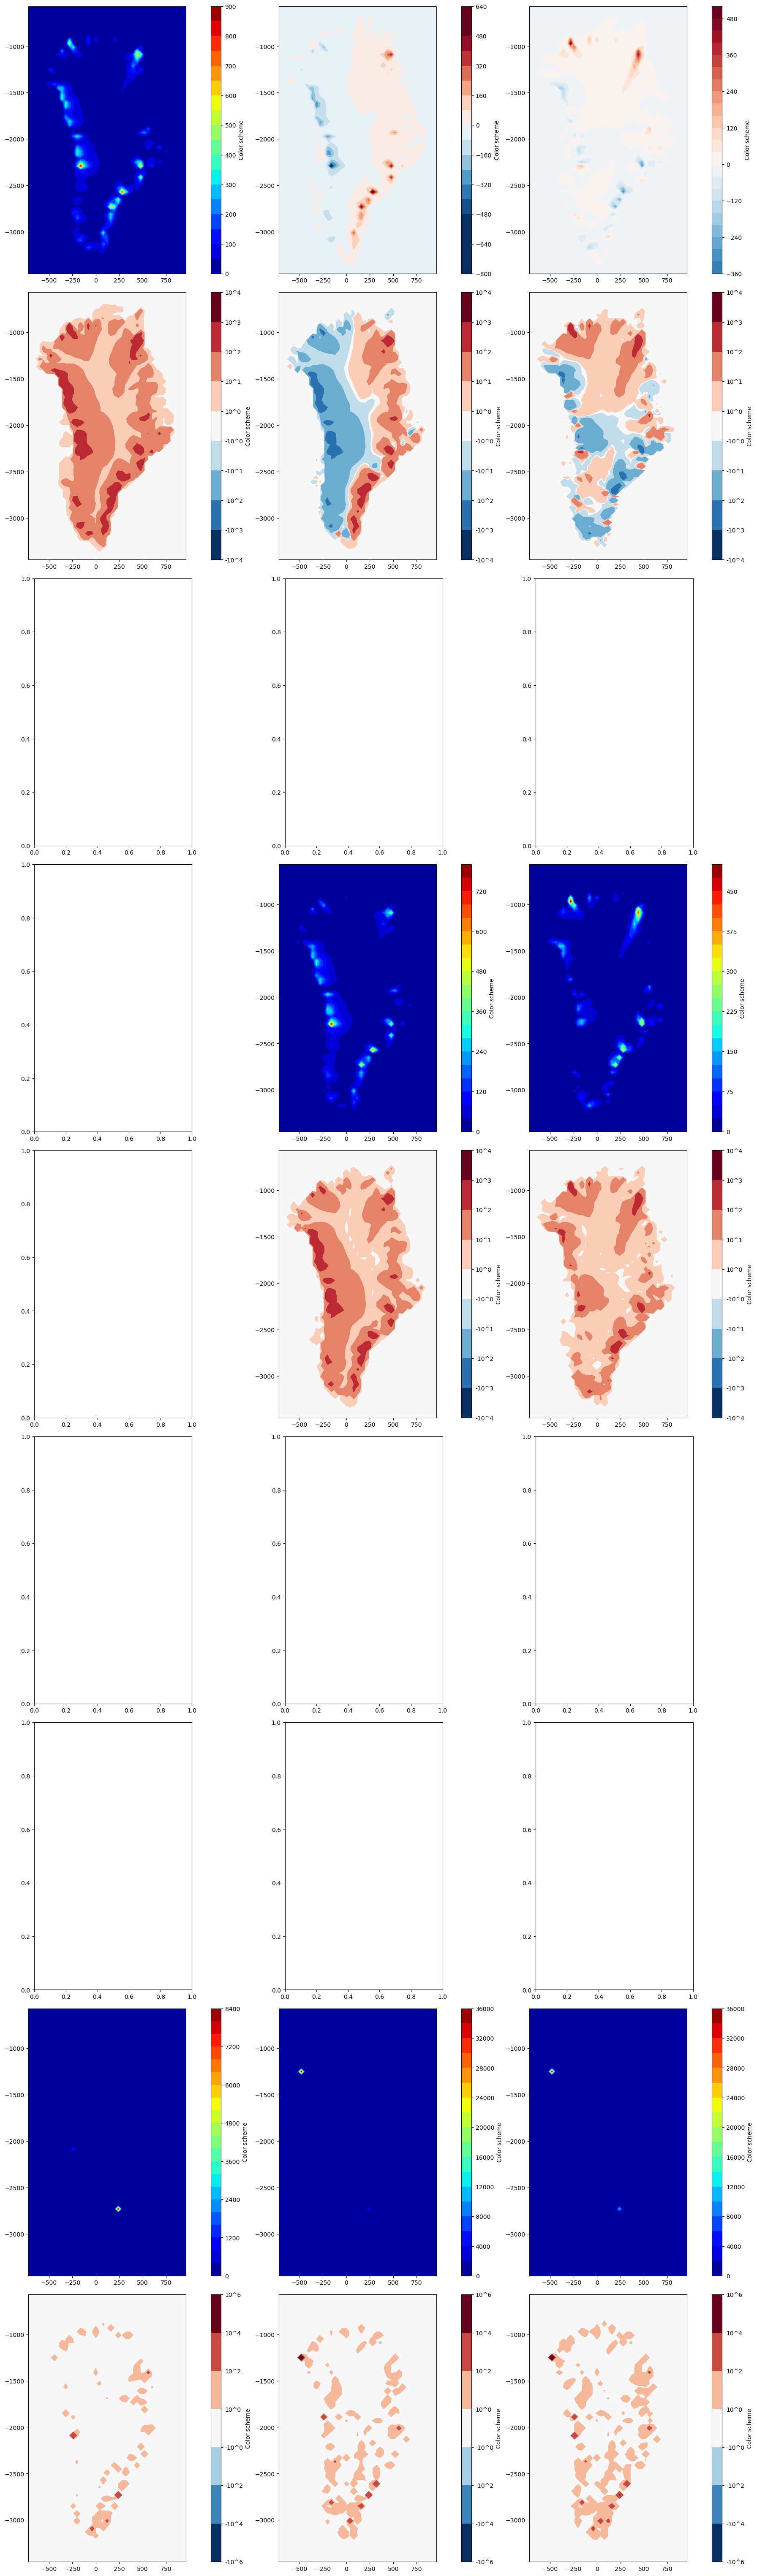

In [3]:
# costs_x_unbounded = 0.5*(vx_data - vx_model)**2 / vx_uncert_unbounded_data**2 
# costs_y_unbounded = 0.5*(vy_data - vy_model)**2 / vy_uncert_unbounded_data**2
costs_x = 0.5*(vx_data - vx_model)**2 / vx_uncert_data**2 
costs_y = 0.5*(vy_data - vy_model)**2 / vy_uncert_data**2

n_rows, n_cols = 9, 3
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vx_data,
                         cmap = 'RdBu_r', nbins = 20, vmin = -500, vmax = 500, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vy_data,
                         cmap = 'RdBu_r', nbins = 20, vmin = -500, vmax = 500, fig = fig, ax = ax[0, 2])

fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vs_data,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[1, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vx_data,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[1, 1])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vy_data,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[1, 2])

# mask = vx_uncert_unbounded_data > -1.e9
# fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
#                       ds_surfvel_data_40km['y'], 
#                       vx_uncert_unbounded_data*mask,
#                       cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[2, 1])
# mask = vy_uncert_unbounded_data > -1.e9
# fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
#                       ds_surfvel_data_40km['y'], 
#                       vy_uncert_unbounded_data*mask,
#                       cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[2, 2])

mask = vx_uncert_data > -1.e9
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vx_uncert_data*mask,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[3, 1])
mask = vy_uncert_data > -1.e9
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vy_uncert_data*mask,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[3, 2])

mask = vx_uncert_data > -1.e9
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vx_uncert_data*mask,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[4, 1])
mask = vy_uncert_data > -1.e9
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vy_uncert_data*mask,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[4, 2])

# fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
#                          ds_surfvel_data_40km['y'], 
#                          costs_x_unbounded,
#                          cmap = 'jet', nbins = 20, fig = fig, ax = ax[5, 0])
# fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
#                          ds_surfvel_data_40km['y'], 
#                          costs_y_unbounded,
#                          cmap = 'jet', nbins = 20, fig = fig, ax = ax[5, 1])
# fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
#                          ds_surfvel_data_40km['y'], 
#                          costs_x_unbounded + costs_y_unbounded,
#                          cmap = 'jet', nbins = 20, fig = fig, ax = ax[5, 2])
# fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
#                          ds_surfvel_data_40km['y'], 
#                          costs_x_unbounded,
#                          cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[6, 0])
# fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
#                          ds_surfvel_data_40km['y'], 
#                          costs_y_unbounded,
#                          cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[6, 1])
# fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
#                          ds_surfvel_data_40km['y'], 
#                          costs_x_unbounded + costs_y_unbounded,
#                          cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[6, 2])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[7, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[7, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x + costs_y,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[7, 2])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[8, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[8, 1])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x + costs_y,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[8, 2])
plt.tight_layout()

# np.sum(costs_x_unbounded), np.sum(costs_y_unbounded), np.sum(costs_x_unbounded) + np.sum(costs_y_unbounded), \
np.sum(costs_x), np.sum(costs_y), np.sum(costs_x) + np.sum(costs_y)

In [4]:
max_idx_x = np.unravel_index(np.argmax(costs_x), costs_x.shape)
max_idx_y = np.unravel_index(np.argmax(costs_y), costs_y.shape)

vx_data[max_idx_x], vx_model[max_idx_x], vy_data[max_idx_y], vy_model[max_idx_y]

(0.0, 40.45432, 0.3502755766780399, -125.3021)

In [5]:
np.sum(0.5*(vx_data - vx_model)**2 / vx_uncert_data**2 
     + 0.5*(vy_data - vy_model)**2 / vy_uncert_data**2)

56036.32157740224

In [6]:
np.sum(0.5*(vx_data - vx_model)**2 / ds_surfvel_data_40km["vx_uncert_modelnotscaled"].data**2 
     + 0.5*(vy_data - vy_model)**2 / ds_surfvel_data_40km["vy_uncert_modelnotscaled"].data**2)

10300.229585690384

In [7]:
np.sum(0.5*(vx_data - vx_model)**2 / ds_surfvel_data_40km["vx_uncert_50"].data**2 
     + 0.5*(vy_data - vy_model)**2 / ds_surfvel_data_40km["vy_uncert_50"].data**2)

11600.409303824556

In [8]:
np.sum(0.5*(vx_data - vx_model)**2 / ds_surfvel_data_40km["vx_uncert_75"].data**2 
     + 0.5*(vy_data - vy_model)**2 / ds_surfvel_data_40km["vy_uncert_75"].data**2)

12903.515480134254

In [9]:
np.sum(0.5*(vx_data - vx_model)**2 / ds_surfvel_data_40km["vx_uncert_80"].data**2 
     + 0.5*(vy_data - vy_model)**2 / ds_surfvel_data_40km["vy_uncert_80"].data**2)

13305.969667401487

In [10]:
np.sum(0.5*(vx_data - vx_model)**2 / ds_surfvel_data_40km["vx_uncert_90"].data**2 
     + 0.5*(vy_data - vy_model)**2 / ds_surfvel_data_40km["vy_uncert_90"].data**2)

14461.274483298235

In [11]:
np.sum(0.5*(vx_data - vx_model)**2 / ds_surfvel_data_40km["vx_uncert_95"].data**2 
     + 0.5*(vy_data - vy_model)**2 / ds_surfvel_data_40km["vy_uncert_95"].data**2)

15419.551250318647

In [12]:
np.sum(0.5*(vx_data - vx_model)**2 / ds_surfvel_data_40km["vx_uncert_99"].data**2 
     + 0.5*(vy_data - vy_model)**2 / ds_surfvel_data_40km["vy_uncert_99"].data**2)

16719.61990856856

/tmp/ipykernel_3238642/2590348404.py:6: RuntimeWarning: divide by zero encountered in divide
  np.nanmax(ds_surfvel_data_40km["vx_uncert_unbounded"].data/np.abs(vx_data) *(np.abs(vx_data) > 0.0)), \
/tmp/ipykernel_3238642/2590348404.py:6: RuntimeWarning: invalid value encountered in multiply
  np.nanmax(ds_surfvel_data_40km["vx_uncert_unbounded"].data/np.abs(vx_data) *(np.abs(vx_data) > 0.0)), \
/tmp/ipykernel_3238642/2590348404.py:7: RuntimeWarning: divide by zero encountered in divide
  np.nanmax(ds_surfvel_data_40km["vy_uncert_unbounded"].data/np.abs(vy_data) *(np.abs(vy_data) > 0.0)), \
/tmp/ipykernel_3238642/2590348404.py:7: RuntimeWarning: invalid value encountered in multiply
  np.nanmax(ds_surfvel_data_40km["vy_uncert_unbounded"].data/np.abs(vy_data) *(np.abs(vy_data) > 0.0)), \
/tmp/ipykernel_3238642/2590348404.py:8: RuntimeWarning: divide by zero encountered in divide
  np.nanmax(ds_surfvel_data_40km["vx_uncert_unbounded"].data/np.abs(vx_data) *(np.abs(vx_data) > 0.0) * mask1

(274.95943900174194,
 182.64278156632918,
 124.77520674186614,
 182.64278156632918,
 124.77520674186614,
 0.18264790414464815,
 1.0422327011971746,
 0.05951144041678722,
 0.0)

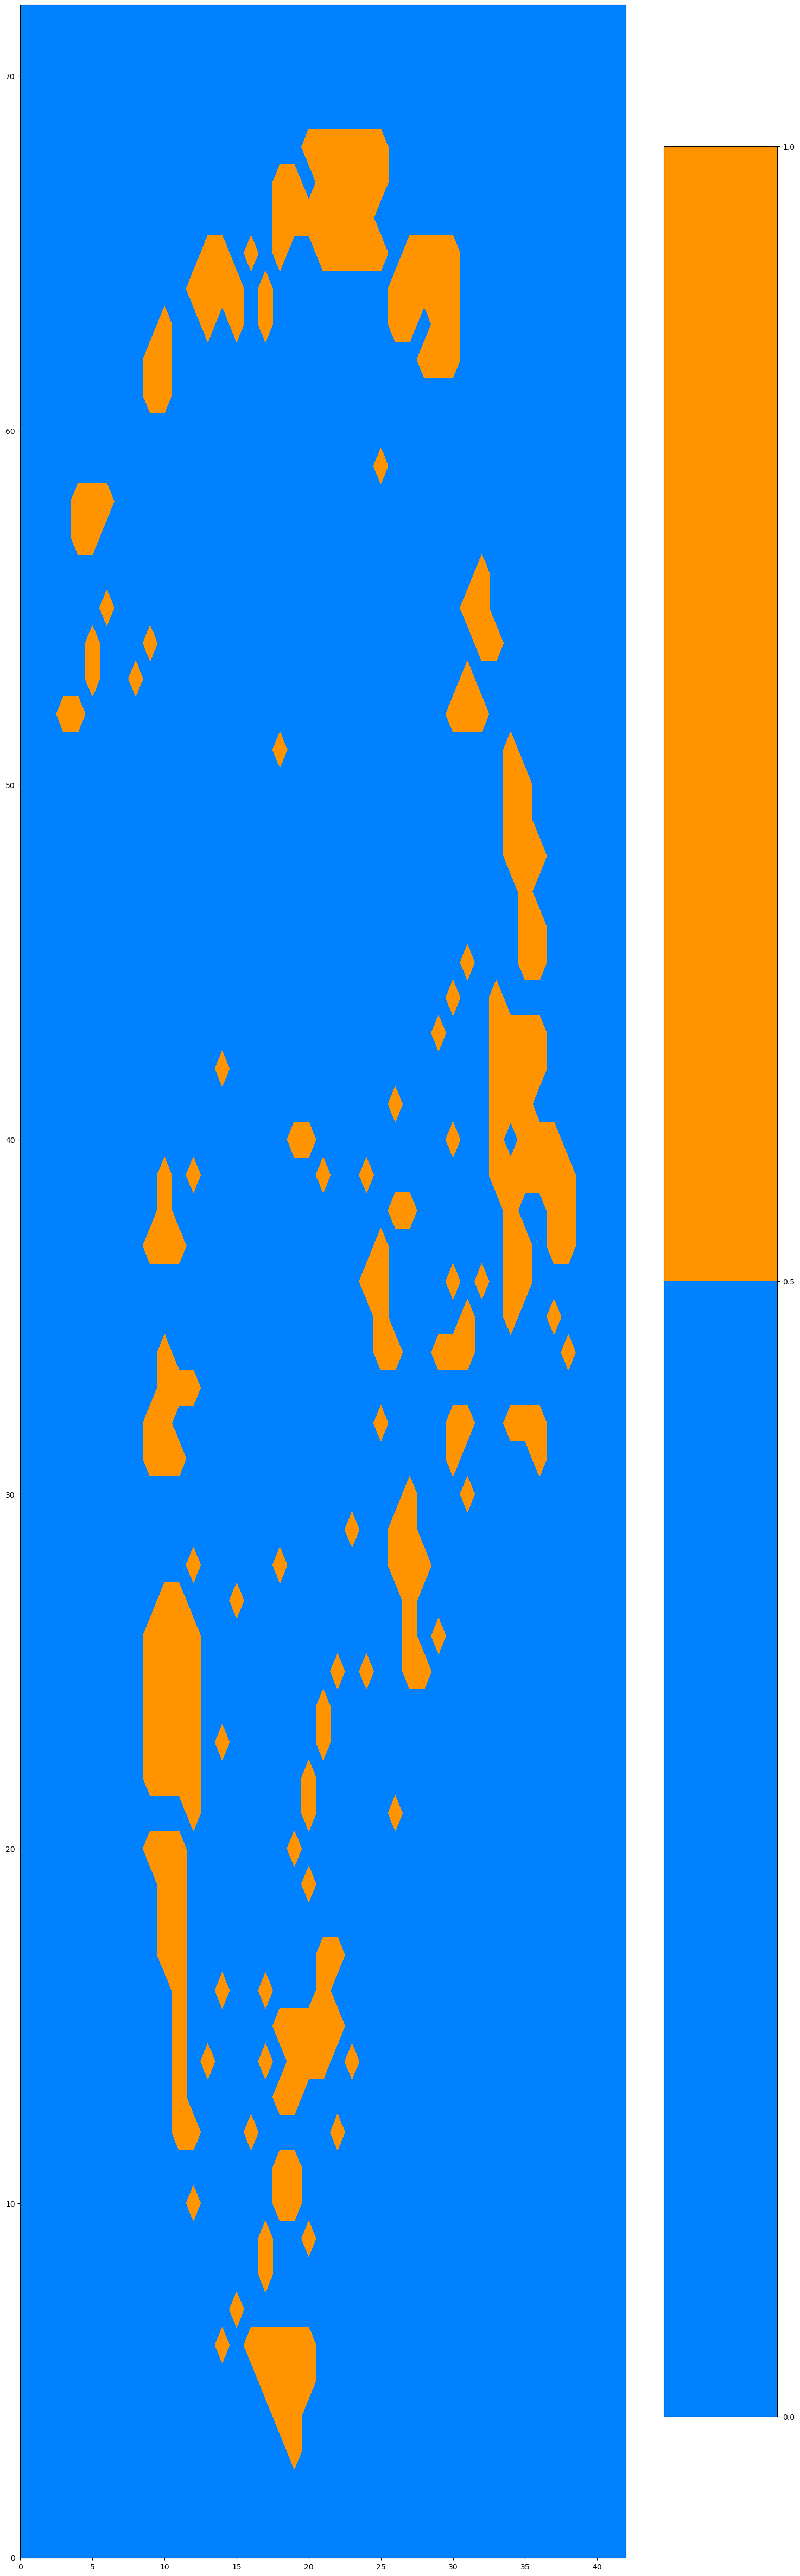

In [13]:
mask1 = ((np.abs(vx_data)/ds_surfvel_data_40km["vx_uncert_unbounded"].data < 1.0) | (np.abs(vy_data)/ds_surfvel_data_40km["vy_uncert_unbounded"].data < 1.0)) & (vs_data > 0)
plt.contourf(mask1)
plt.colorbar()

np.max(vs_data[mask1]), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_unbounded"].data/np.abs(vx_data) *(np.abs(vx_data) > 0.0)), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_unbounded"].data/np.abs(vy_data) *(np.abs(vy_data) > 0.0)), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_unbounded"].data/np.abs(vx_data) *(np.abs(vx_data) > 0.0) * mask1), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_unbounded"].data/np.abs(vy_data) *(np.abs(vy_data) > 0.0) * mask1), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_unbounded"].data/np.abs(vx_data) *(np.abs(vx_data) > 10.0) * mask1), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_unbounded"].data/np.abs(vy_data) *(np.abs(vy_data) > 10.0) * mask1), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_unbounded"].data/np.abs(vx_data) *(np.abs(vx_data) > 100.0) * mask1), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_unbounded"].data/np.abs(vy_data) *(np.abs(vy_data) > 100.0) * mask1)

In [14]:
mask2 = ((np.abs(vx_data)/ds_surfvel_data_40km["vx_uncert_scaled_og_old"].data < 1.0) | (np.abs(vy_data)/ds_surfvel_data_40km["vy_uncert_scaled_og_old"].data < 1.0)) & (vs_data > 0)
plt.contourf(mask2)
plt.colorbar()
np.max(vs_data[mask2]), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_scaled_og_old"].data/np.abs(vx_data) *(np.abs(vx_data) > 0.0)), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_scaled_og_old"].data/np.abs(vy_data) *(np.abs(vy_data) > 0.0)), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_scaled_og_old"].data/np.abs(vx_data) *(np.abs(vx_data) > 0.0) * mask2), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_scaled_og_old"].data/np.abs(vy_data) *(np.abs(vy_data) > 0.0) * mask2), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_scaled_og_old"].data/np.abs(vx_data) *(np.abs(vx_data) > 10.0) * mask2), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_scaled_og_old"].data/np.abs(vy_data) *(np.abs(vy_data) > 10.0) * mask2), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_scaled_og_old"].data/np.abs(vx_data) *(np.abs(vx_data) > 100.0) * mask2), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_scaled_og_old"].data/np.abs(vy_data) *(np.abs(vy_data) > 100.0) * mask2)

KeyError: "No variable named 'vx_uncert_scaled_og_old'. Variables on the dataset include ['crs', 'x', 'y', 'lat', 'lon', ..., 'vy_uncert_80', 'vx_uncert_75', 'vy_uncert_75', 'vx_uncert_50', 'vy_uncert_50']"

In [ ]:
plt.contourf(mask1 & mask2)
plt.colorbar()

In [ ]:
plt.contourf(mask1 & (~mask2))
plt.colorbar()

In [ ]:
mask3 = (~mask1) & (mask2)
plt.contourf(mask3)
plt.colorbar()

In [ ]:
with np.printoptions(threshold=np.inf):
    print(np.sort(np.reshape(vs_data, (-1, )))[::-1])

In [ ]:
np.sort((vs_data[mask1]))[::-1]

In [ ]:
np.sort((vs_data[mask3]))[::-1]

In [ ]:
np.sum(mask1), np.sum(mask2), np.sum(mask3)

In [ ]:
np.sum(mask1) / (mask1.shape[0]*mask1.shape[1]) * 100, \
np.sum(mask2) / (mask2.shape[0]*mask2.shape[1]) * 100, \
np.sum(mask3) / (mask3.shape[0]*mask3.shape[1]) * 100

In [ ]:
mask1 = ((np.abs(vx_data)/ds_surfvel_data_40km["vx_uncert_unbounded"].data < 1.0) | (np.abs(vy_data)/ds_surfvel_data_40km["vy_uncert_unbounded"].data < 1.0)) & (vs_data > 0)
plt.contourf(mask1)
plt.colorbar()

np.max(vs_data[mask1]), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_unbounded"].data/np.abs(vx_data) *(np.abs(vx_data) > 0.0)), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_unbounded"].data/np.abs(vy_data) *(np.abs(vy_data) > 0.0)), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_unbounded"].data/np.abs(vx_data) *(np.abs(vx_data) > 0.0) * mask1), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_unbounded"].data/np.abs(vy_data) *(np.abs(vy_data) > 0.0) * mask1), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_unbounded"].data/np.abs(vx_data) *(np.abs(vx_data) > 10.0) * mask1), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_unbounded"].data/np.abs(vy_data) *(np.abs(vy_data) > 10.0) * mask1), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_unbounded"].data/np.abs(vx_data) *(np.abs(vx_data) > 100.0) * mask1), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_unbounded"].data/np.abs(vy_data) *(np.abs(vy_data) > 100.0) * mask1)

In [ ]:
mask2 = ((np.abs(vx_data)/ds_surfvel_data_40km["vx_uncert_scaled_og_og_og_old"].data < 1.0) | (np.abs(vy_data)/ds_surfvel_data_40km["vy_uncert_scaled_og_og_og_old"].data < 1.0)) & (vs_data > 0)
plt.contourf(mask2)
plt.colorbar()
np.max(vs_data[mask2]), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_scaled_og_og_og_old"].data/np.abs(vx_data) *(np.abs(vx_data) > 0.0)), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_scaled_og_og_og_old"].data/np.abs(vy_data) *(np.abs(vy_data) > 0.0)), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_scaled_og_og_og_old"].data/np.abs(vx_data) *(np.abs(vx_data) > 0.0) * mask2), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_scaled_og_og_og_old"].data/np.abs(vy_data) *(np.abs(vy_data) > 0.0) * mask2), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_scaled_og_og_og_old"].data/np.abs(vx_data) *(np.abs(vx_data) > 10.0) * mask2), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_scaled_og_og_og_old"].data/np.abs(vy_data) *(np.abs(vy_data) > 10.0) * mask2), \
np.nanmax(ds_surfvel_data_40km["vx_uncert_scaled_og_og_og_old"].data/np.abs(vx_data) *(np.abs(vx_data) > 100.0) * mask2), \
np.nanmax(ds_surfvel_data_40km["vy_uncert_scaled_og_og_og_old"].data/np.abs(vy_data) *(np.abs(vy_data) > 100.0) * mask2)

In [ ]:
plt.contourf(mask1 & mask2)
plt.colorbar()

In [ ]:
plt.contourf(mask1 & (~mask2))
plt.colorbar()

In [ ]:
mask3 = (~mask1) & (mask2)
plt.contourf(mask3)
plt.colorbar()

In [ ]:
with np.printoptions(threshold=np.inf):
    print(np.sort(np.reshape(vs_data, (-1, )))[::-1])

In [ ]:
np.sort((vs_data[mask1]))[::-1]

In [ ]:
np.sort((vs_data[mask3]))[::-1]

In [ ]:
np.sum(mask1), np.sum(mask2), np.sum(mask3)

In [ ]:
np.sum(mask1) / (mask1.shape[0]*mask1.shape[1]) * 100, \
np.sum(mask2) / (mask2.shape[0]*mask2.shape[1]) * 100, \
np.sum(mask3) / (mask3.shape[0]*mask3.shape[1]) * 100

In [ ]:
np.min(np.abs(vx_data[np.abs(vx_data) > 100.0])/ds_surfvel_data_40km["vx_uncert_scaled_og_og_og_old"].data[np.abs(vx_data) > 100.0])

In [ ]:
np.min(np.abs(vy_data[np.abs(vy_data) > 100.0])/ds_surfvel_data_40km["vy_uncert_scaled_og_og_og_old"].data[np.abs(vy_data) > 100.0])

In [ ]:
field_x = ds_surfvel_data_40km["vx_uncert_scaled_og_og_old"].data
field_y = ds_surfvel_data_40km["vy_uncert_scaled_og_og_old"].data
cost = 0.5*(vx_data - vx_model)**2 / field_x**2 + 0.5*(vy_data - vy_model)**2 / field_y**2

n_rows, n_cols = 2, 3
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         cost,
                         cmap = 'jet', nbins = 100, vmax = 0.1*np.max(cost), fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vx_data,
                         cmap = 'RdBu_r', nbins = 20, vmin = -500, vmax = 500, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vy_data,
                         cmap = 'RdBu_r', nbins = 20, vmin = -500, vmax = 500, fig = fig, ax = ax[0, 2])

fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         cost,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[1, 0])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         field_x,
                         cmap = 'RdBu_r', nbins = 20, vmin = -500, vmax = 500, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         field_y,
                         cmap = 'RdBu_r', nbins = 20, vmin = -500, vmax = 500, fig = fig, ax = ax[1, 2])

In [ ]:
n_rows, n_cols = 9, 3
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_data,
                         cmap = 'jet', nbins = 100, vmax = 400, fig = fig, ax = ax[0, 0])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_model,
                         cmap = 'jet', nbins = 100, vmax = 400, fig = fig, ax = ax[0, 1])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_model_tuned,
                         cmap = 'jet', nbins = 100, vmax = 400, fig = fig, ax = ax[0, 2])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         10**state['xx_c_slide_init'],
                         cmap = 'RdBu_r', nbins = 100, vmin = 0, vmax = 1.7, fig = fig, ax = ax[1, 0])
ax[1, 0].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_land, levels=[0], color="black")
ax[1, 0].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         (vs_model/vs_data - 1)*(vs_data > 0),
                         cmap = 'RdBu_r', nbins = 100, vmin = -1, vmax = 1, fig = fig, ax = ax[1, 1])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         (vs_model_tuned/vs_data - 1)*(vs_data > 0),
                         cmap = 'RdBu_r', nbins = 100, vmin = -1, vmax = 1, fig = fig, ax = ax[1, 2])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vx_data,
                         cmap = 'RdBu_r', nbins = 100, vmin = -400, vmax = 400, fig = fig, ax = ax[2, 0])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vx_model,
                         cmap = 'RdBu_r', nbins = 100, vmin = -400, vmax = 400, fig = fig, ax = ax[2, 1])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vx_model_tuned,
                         cmap = 'RdBu_r', nbins = 100, vmin = -400, vmax = 400, fig = fig, ax = ax[2, 2])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         np.clip((vx_model/vx_data - 1)*(vx_data != 0), -1, 1),
                         cmap = 'RdBu_r', nbins = 100, vmin = -1, vmax = 1, fig = fig, ax = ax[3, 1])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         np.clip((vx_model_tuned/vx_data - 1)*(vx_data != 0), -1, 1),
                         cmap = 'RdBu_r', nbins = 100, vmin = -1, vmax = 1, fig = fig, ax = ax[3, 2])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         np.clip((vx_model - vx_data)/vx_uncert_data*(vx_uncert_data > 0), -2, 2),
                         cmap = 'RdBu_r', nbins = 100, vmin = -2, vmax = 2, fig = fig, ax = ax[4, 1])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         np.clip((vx_model_tuned - vx_data)/vx_uncert_data*(vx_uncert_data > 0), -2, 2),
                         cmap = 'RdBu_r', nbins = 100, vmin = -2, vmax = 2, fig = fig, ax = ax[4, 2])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vy_data,
                         cmap = 'RdBu_r', nbins = 100, vmin = -400, vmax = 400, fig = fig, ax = ax[5, 0])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vy_model,
                         cmap = 'RdBu_r', nbins = 100, vmin = -400, vmax = 400, fig = fig, ax = ax[5, 1])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vy_model_tuned,
                         cmap = 'RdBu_r', nbins = 100, vmin = -400, vmax = 400, fig = fig, ax = ax[5, 2])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         np.clip((vy_model/vy_data - 1)*(vy_data != 0), -1, 1),
                         cmap = 'RdBu_r', nbins = 100, vmin = -1, vmax = 1, fig = fig, ax = ax[6, 1])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         np.clip((vy_model_tuned/vy_data - 1)*(vy_data != 0), -1, 1),
                         cmap = 'RdBu_r', nbins = 100, vmin = -1, vmax = 1, fig = fig, ax = ax[6, 2])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         np.abs(vy_model - vy_data)/vy_uncert_data*(vy_uncert_data > 0),
                         cmap = 'RdBu_r', nbins = 100, vmin = -2, vmax = 2, fig = fig, ax = ax[7, 1])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         np.abs(vy_model_tuned - vy_data)/vy_uncert_data*(vy_uncert_data > 0),
                         cmap = 'RdBu_r', nbins = 100, vmin = -2, vmax = 2, fig = fig, ax = ax[7, 2])

In [ ]:
n_rows, n_cols = 2, 2
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         10**state['xx_c_slide_init']*0.0 + 0.85,
                         cmap = 'RdBu_r', nbins = 100, vmin = 0, vmax = 1.7, fig = fig, ax = ax[0, 0])
ax[0, 0].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_land, levels=[0], color="black")
ax[0, 0].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         (vs_model/vs_data - 1)*(vs_data > 0),
                         cmap = 'RdBu_r', nbins = 100, vmin = -2, vmax = 2, fig = fig, ax = ax[0, 1])
ax[0, 1].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_land, levels=[0], color="black")
ax[0, 1].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         10**state['xx_c_slide_init'],
                         cmap = 'RdBu_r', nbins = 100, vmin = 0, vmax = 1.7, fig = fig, ax = ax[1, 0])
ax[1, 0].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_land, levels=[0], color="black")
ax[1, 0].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         (vs_model_tuned/vs_data - 1)*(vs_data > 0),
                         cmap = 'RdBu_r', nbins = 100, vmin = -2, vmax = 2, fig = fig, ax = ax[1, 1])
ax[1, 1].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_land, levels=[0], color="black")
ax[1, 1].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

In [ ]:
state_mini = xr.open_dataset("/scratch2/shreyas/tuneCS_mini/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")

n_rows, n_cols = 1, 1
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

ax.set_box_aspect(1/aspect_ratio)
# for axis in ax.flatten():
#     axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         np.clip(10**state_mini['xx_c_slide_init'], 0, 10),
                         cmap = 'jet', nbins = 100, vmin = 0, vmax = 10, fig = fig, ax = ax)
ax.contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_land, levels=[0], colors="white")
ax.contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_ice, levels=[0], colors="white", linestyles = "dashed")

In [ ]:
U_misfit_sa_mini = np.load("/scratch2/shreyas/tuneCS_mini/REVD_single_approx/U_misfit.npy")
U_misfit_sa_mini_reshaped = np.reshape(U_misfit_sa_mini[:73*43, :], (73, 43, -1))

n_rows, n_cols = 2, 2
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         U_misfit_sa_mini_reshaped[:, :, 0],
                         cmap = 'RdBu_r', nbins = 20, vmin = -0.3, vmax=0.3, fig = fig, ax = ax[0, 0])
ax[0, 0].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_land, levels=[0], color="black")
ax[0, 0].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         U_misfit_sa_mini_reshaped[:, :, 4],
                         cmap = 'RdBu_r', nbins = 20, vmin = -0.3, vmax=0.3, fig = fig, ax = ax[0, 1])
ax[0, 1].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_land, levels=[0], color="black")
ax[0, 1].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         U_misfit_sa_mini_reshaped[:, :, 9],
                         cmap = 'RdBu_r', nbins = 20, vmin = -0.3, vmax=0.3, fig = fig, ax = ax[1, 0])
ax[1, 0].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_land, levels=[0], color="black")
ax[1, 0].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")


fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         U_misfit_sa_mini_reshaped[:, :, -1],
                         cmap = 'RdBu_r', nbins = 20, vmin = -0.3, vmax=0.3, fig = fig, ax = ax[1, 1])
ax[1, 1].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_land, levels=[0], color="black")
ax[1, 1].contour(ds_surfvel_data_40km['x'], 
                 ds_surfvel_data_40km['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

plt.tight_layout()